In [ ]:
! pip install matplotlib numpy ipympl mpld3

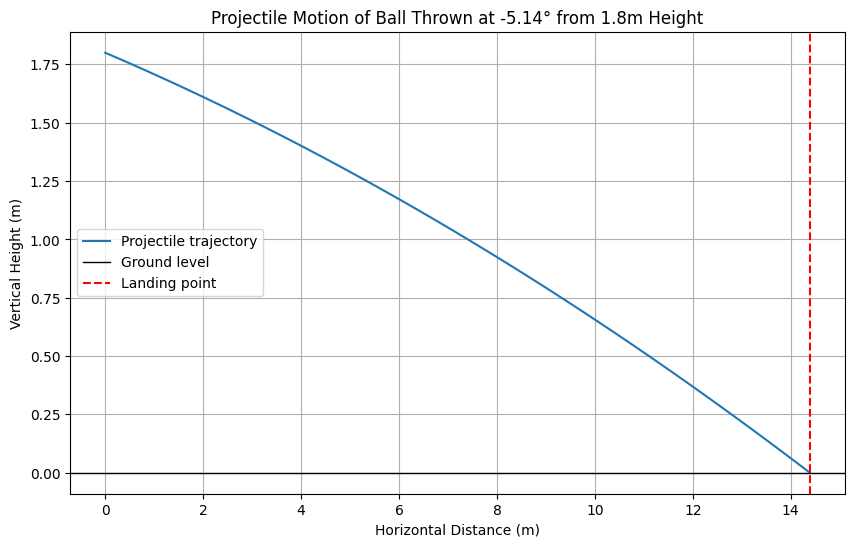

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # acceleration due to gravity (m/s^2)

# Given parameters
y_0 = 1.8       # initial height (m)
theta_deg = -5.14   # launch angle in degrees (negative for downward)
v = 45          # initial speed (m/s)

# Convert angle to radians
theta_rad = np.radians(theta_deg)

# Initial velocities
v_x = v * np.cos(theta_rad)  # horizontal velocity (m/s)
v_y = v * np.sin(theta_rad)  # vertical velocity (m/s)

# Solve the vertical motion equation for time when y(t) = 0
# Standard formula for flight time from height y0:
#   t_flight = ( v_y + sqrt(v_y^2 + 2*g*y_0 ) ) / g
discriminant = v_y**2 + 2*g*y_0
t_flight = (v_y + np.sqrt(discriminant)) / g  # physically relevant positive time

# Time values for plotting
t = np.linspace(0, t_flight, num=100)

# Horizontal and vertical positions
x_t = v_x * t
y_t = y_0 + v_y * t - 0.5 * g * t**2

# (Optional) Force the last point to be exactly y = 0
y_t[-1] = 0.0

# Calculate the exact horizontal landing position
x_land = x_t[-1]  # or simply v_x * t_flight

# Plotting the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x_t, y_t, label="Projectile trajectory")

# Ground line and vertical line at landing
plt.axhline(0, color='black', linewidth=1, label="Ground level")
plt.axvline(x_land, color='red', linestyle='--', label="Landing point")

# Labels and Title
plt.title("Projectile Motion of Ball Thrown at -5.14° from 1.8m Height")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


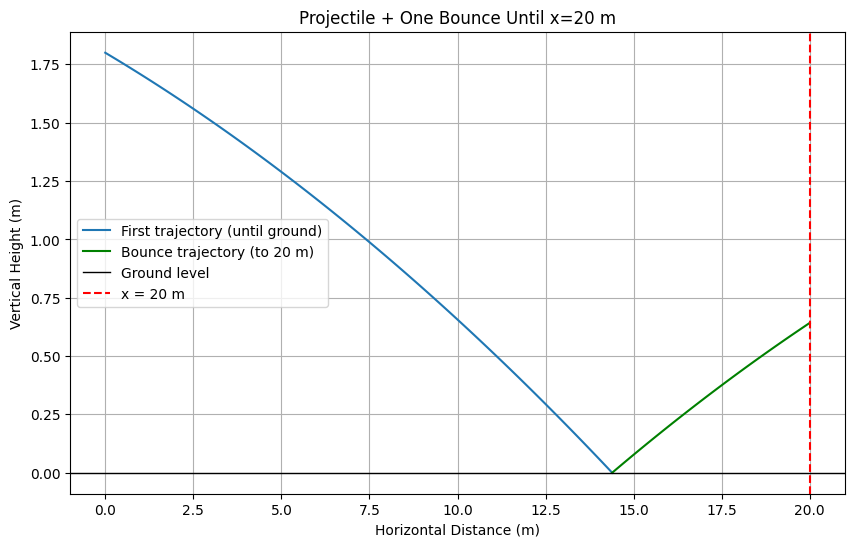

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Given initial parameters
y_0 = 1.8       # initial height (m)
theta_deg = -5.14   # launch angle in degrees (negative => downward)
v = 45          # initial speed (m/s)

# Convert angle to radians
theta_rad = np.radians(theta_deg)

# Initial velocities
v_x = v * np.cos(theta_rad)
v_y = v * np.sin(theta_rad)

# ---------------------------
# 1) FIRST TRAJECTORY
# ---------------------------

# Solve for time of flight using the standard "upper" root
discriminant = v_y**2 + 2*g*y_0
t_flight = ( v_y + np.sqrt(discriminant) ) / g  # physically relevant root

# Time array up to ground contact
t = np.linspace(0, t_flight, num=100)

# Positions: x(t), y(t)
x_t = v_x * t
y_t = y_0 + v_y * t - 0.5 * g * t**2

# Force last y-value to be zero for a clean landing
y_t[-1] = 0.0

# Horizontal landing coordinate
x_land = x_t[-1]

# Compute the vertical velocity just before impact
v_y_impact = v_y - g * t_flight

# ---------------------------
# 2) BOUNCE TRAJECTORY
# ---------------------------
# Coefficient of restitution
e = 0.8

# Post-bounce vertical velocity
v_y_bounce = - e * v_y_impact

# We'll assume the horizontal velocity remains the same
v_x_bounce = v_x

# We want the ball to move from x_land to x=20 after the bounce:
x_stop = 20

# Safety check: if x_land >= 20, no bounce segment needed
if x_land < x_stop:

    # Time needed to get from x_land to x=20
    T_stop = (x_stop - x_land) / v_x_bounce

    # New time array for the bounce
    t2 = np.linspace(0, T_stop, num=50)

    # Now, the initial conditions for the bounce are:
    #   x'(0) = x_land,  y'(0) = 0
    #   v_x'(0) = v_x_bounce,  v_y'(0) = v_y_bounce
    # So for t' in [0, T_stop]:
    x_bounce = x_land + v_x_bounce * t2
    y_bounce = 0.0 + (v_y_bounce * t2) - 0.5 * g * t2**2

else:
    # If the ball already lands beyond 20 m, you might skip the bounce or handle differently
    t2 = np.array([])
    x_bounce = np.array([])
    y_bounce = np.array([])

# ---------------------------
# 3) PLOT EVERYTHING
# ---------------------------
plt.figure(figsize=(10,6))

# First trajectory
plt.plot(x_t, y_t, label="First trajectory (until ground)")

# If x_land < 20, plot the bounce segment
if len(t2) > 0:
    plt.plot(x_bounce, y_bounce, 'g', label="Bounce trajectory (to 20 m)")

# Draw ground line
plt.axhline(0, color='black', linewidth=1, label="Ground level")

# Mark final vertical line at x=20 for visual reference
plt.axvline(x_stop, color='red', linestyle='--', label="x = 20 m")

plt.title("Projectile + One Bounce Until x=20 m")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.legend()
plt.grid(True)
plt.show()


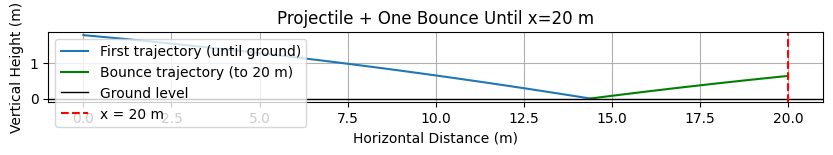

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Given initial parameters
y_0 = 1.8       # initial height (m)
theta_deg = -5.14   # launch angle in degrees (negative => downward)
v = 45          # initial speed (m/s)

# Convert angle to radians
theta_rad = np.radians(theta_deg)

# Initial velocities
v_x = v * np.cos(theta_rad)
v_y = v * np.sin(theta_rad)

# ---------------------------
# 1) FIRST TRAJECTORY
# ---------------------------

# Solve for time of flight using the standard "upper" root
discriminant = v_y**2 + 2*g*y_0
t_flight = (v_y + np.sqrt(discriminant)) / g  # physically relevant root

# Time array up to ground contact
t = np.linspace(0, t_flight, num=100)

# Positions: x(t), y(t)
x_t = v_x * t
y_t = y_0 + v_y * t - 0.5 * g * t**2

# Force last y-value to be zero for a clean landing
y_t[-1] = 0.0

# Horizontal landing coordinate
x_land = x_t[-1]

# Compute the vertical velocity just before impact
v_y_impact = v_y - g * t_flight

# ---------------------------
# 2) BOUNCE TRAJECTORY
# ---------------------------
# Coefficient of restitution
e = 0.8

# Post-bounce vertical velocity
v_y_bounce = - e * v_y_impact

# We'll assume the horizontal velocity remains the same
v_x_bounce = v_x

# We want the ball to move from x_land to x=20 after the bounce:
x_stop = 20

# Safety check: if x_land >= 20, no bounce segment needed
if x_land < x_stop:

    # Time needed to get from x_land to x=20
    T_stop = (x_stop - x_land) / v_x_bounce

    # New time array for the bounce
    t2 = np.linspace(0, T_stop, num=50)

    # Initial conditions for the bounce
    #   x'(0) = x_land,  y'(0) = 0
    #   v_x'(0) = v_x_bounce,  v_y'(0) = v_y_bounce
    x_bounce = x_land + v_x_bounce * t2
    y_bounce = 0.0 + (v_y_bounce * t2) - 0.5 * g * t2**2

else:
    t2 = np.array([])
    x_bounce = np.array([])
    y_bounce = np.array([])

# ---------------------------
# 3) PLOT EVERYTHING
# ---------------------------
plt.figure(figsize=(10,6))

# First trajectory
plt.plot(x_t, y_t, label="First trajectory (until ground)")

# If x_land < 20, plot the bounce segment
if len(t2) > 0:
    plt.plot(x_bounce, y_bounce, 'g', label="Bounce trajectory (to 20 m)")

# Draw ground line
plt.axhline(0, color='black', linewidth=1, label="Ground level")

# Mark final vertical line at x=20 for visual reference
plt.axvline(x_stop, color='red', linestyle='--', label="x = 20 m")

plt.title("Projectile + One Bounce Until x=20 m")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.legend()
plt.grid(True)

# >>> Enforce equal scaling: 1 m in x = 1 m in y <<<
plt.gca().set_aspect("equal", adjustable="box")

# (Optional) define x/y-limits for a nicer view
# plt.xlim(0, 25)
# plt.ylim(-2, 5)

plt.show()


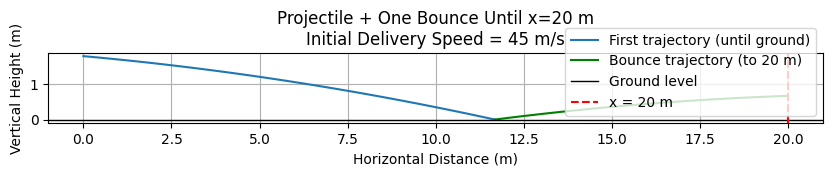

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Given initial parameters
y_0 = 1.8           # initial height (m)
theta_deg = -5.14   # launch angle in degrees (negative => downward)
v = 30.0            # initial (delivery) speed (m/s)

# Convert angle to radians
theta_rad = np.radians(theta_deg)

# Initial velocities
v_x = v * np.cos(theta_rad)
v_y = v * np.sin(theta_rad)

# ---------------------------
# 1) FIRST TRAJECTORY
# ---------------------------

# Solve for time of flight using the standard "upper" root
discriminant = v_y**2 + 2*g*y_0
t_flight = (v_y + np.sqrt(discriminant)) / g  # physically relevant root

# Time array up to ground contact
t = np.linspace(0, t_flight, num=100)

# Positions: x(t), y(t)
x_t = v_x * t
y_t = y_0 + v_y * t - 0.5 * g * t**2

# Force the last y-value to be zero for a clean landing
y_t[-1] = 0.0

# Horizontal landing coordinate
x_land = x_t[-1]

# Compute the vertical velocity just before impact
v_y_impact = v_y - g * t_flight

# ---------------------------
# 2) BOUNCE TRAJECTORY
# ---------------------------
# Coefficient of restitution
e = 0.58

# Post-bounce vertical velocity
v_y_bounce = - e * v_y_impact

# We'll assume the horizontal velocity remains the same
v_x_bounce = v_x

# We want the ball to move from x_land to x=20 after the bounce:
x_stop = 20

# Safety check: if x_land >= 20, no bounce segment needed
if x_land < x_stop:

    # Time needed to get from x_land to x=20
    T_stop = (x_stop - x_land) / v_x_bounce

    # New time array for the bounce
    t2 = np.linspace(0, T_stop, num=50)

    # Initial conditions for the bounce:
    #   x'(0) = x_land,  y'(0) = 0
    #   v_x'(0) = v_x_bounce,  v_y'(0) = v_y_bounce
    x_bounce = x_land + v_x_bounce * t2
    y_bounce = 0.0 + (v_y_bounce * t2) - 0.5 * g * t2**2

else:
    # If x_land is already >= 20, skip the bounce
    t2 = np.array([])
    x_bounce = np.array([])
    y_bounce = np.array([])

# ---------------------------
# 3) PLOT EVERYTHING
# ---------------------------
plt.figure(figsize=(10,6))

# First trajectory
plt.plot(x_t, y_t, label="First trajectory (until ground)")

# If x_land < 20, plot the bounce segment
if len(t2) > 0:
    plt.plot(x_bounce, y_bounce, 'g', label="Bounce trajectory (to 20 m)")

# Draw ground line
plt.axhline(0, color='black', linewidth=1, label="Ground level")

# Mark final vertical line at x=20 for visual reference
plt.axvline(x_stop, color='red', linestyle='--', label="x = 20 m")

plt.title("Projectile + One Bounce Until x=20 m\nInitial Delivery Speed = 45 m/s")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Height (m)")
plt.legend()
plt.grid(True)

# >>> Enforce equal scaling: 1 m in x = 1 m in y <<<
plt.gca().set_aspect("equal", adjustable="box")

# Optionally, set x- and y-limits for a nicer view
# plt.xlim(0, 25)
# plt.ylim(-2, 5)

plt.show()


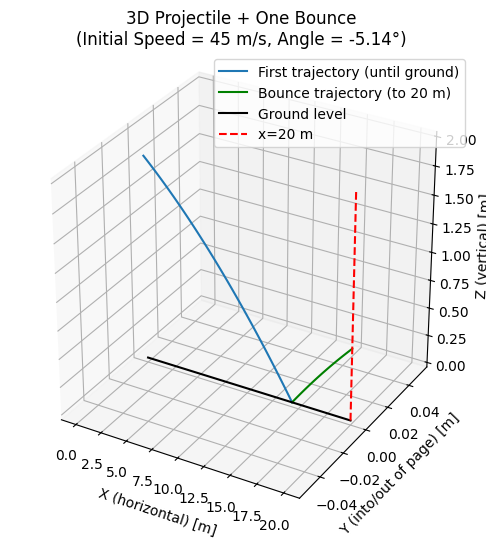

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# This import is optional in newer Matplotlib, but needed in older versions
# from mpl_toolkits.mplot3d import Axes3D  

# Constants
g = 9.81  # m/s^2

# Given initial parameters
y_0 = 1.8           # initial height (m)
theta_deg = -5.14   # launch angle in degrees (negative => downward)
v = 45.0            # initial (delivery) speed (m/s)

# Convert angle to radians
theta_rad = np.radians(theta_deg)

# Initial velocities
v_x = v * np.cos(theta_rad)   # horizontal
v_y = v * np.sin(theta_rad)   # vertical

# ---------------------------
# 1) FIRST TRAJECTORY
# ---------------------------

# Solve for time of flight using the standard "upper" root
discriminant = v_y**2 + 2*g*y_0
t_flight = (v_y + np.sqrt(discriminant)) / g  # physically relevant root

# Time array up to ground contact
t = np.linspace(0, t_flight, num=100)

# Positions: x(t), z(t)  (We'll call the vertical coordinate 'z')
x_t = v_x * t
z_t = y_0 + v_y * t - 0.5 * g * t**2

# Force the last z-value to be zero for a clean landing
z_t[-1] = 0.0

# Horizontal landing coordinate
x_land = x_t[-1]

# Compute the vertical velocity just before impact
v_y_impact = v_y - g * t_flight

# ---------------------------
# 2) BOUNCE TRAJECTORY
# ---------------------------
# Coefficient of restitution
e = 0.8

# Post-bounce vertical velocity
v_y_bounce = - e * v_y_impact

# We'll assume the horizontal velocity remains the same
v_x_bounce = v_x

# We want the ball to move from x_land to x=20 after the bounce:
x_stop = 20

# Safety check: if x_land >= 20, no bounce segment needed
if x_land < x_stop:

    # Time needed to get from x_land to x=20
    T_stop = (x_stop - x_land) / v_x_bounce

    # Time array for the bounce
    t2 = np.linspace(0, T_stop, num=50)

    # Initial conditions for the bounce:
    #   x'(0) = x_land, z'(0) = 0
    #   v_x'(0) = v_x_bounce,  v_y'(0) = v_y_bounce
    x_bounce = x_land + v_x_bounce * t2
    z_bounce = 0.0 + (v_y_bounce * t2) - 0.5 * g * t2**2
else:
    # If x_land >= 20, skip the bounce
    t2 = np.array([])
    x_bounce = np.array([])
    z_bounce = np.array([])

# ---------------------------
# 3) 3D PLOTTING
# ---------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# First trajectory: plot in the plane y=0
ax.plot(x_t, np.zeros_like(x_t), z_t, label="First trajectory (until ground)")

# Bounce trajectory, if it exists
if len(t2) > 0:
    ax.plot(x_bounce, np.zeros_like(x_bounce), z_bounce,
            'g', label="Bounce trajectory (to 20 m)")

# Draw a "ground" line from x=0 to x=20 (or a bit further) at z=0
ground_xmax = max(20, x_land)
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k-', label="Ground level")

# Optional: Mark a vertical line at x=20 to highlight that boundary
ax.plot([x_stop, x_stop], [0, 0], [0, 2], 'r--', label="x=20 m")

# Titles and labels
ax.set_title("3D Projectile + One Bounce\n(Initial Speed = 45 m/s, Angle = -5.14°)")
ax.set_xlabel("X (horizontal) [m]")
ax.set_ylabel("Y (into/out of page) [m]")
ax.set_zlabel("Z (vertical) [m]")

ax.legend()

# Make the 3D box aspect ratio approximately equal
# so that 1 m in X, Y, Z all look about the same
ax.set_box_aspect((1, 1, 1))

plt.show()


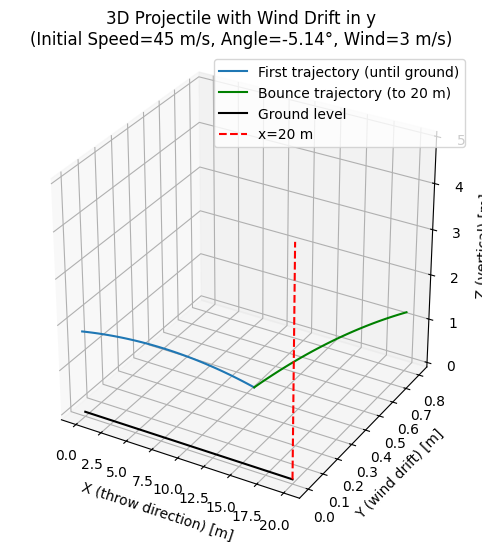

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Given initial parameters
y_0 = 1.8           # initial height (m)
theta_deg = -5.14   # launch angle in degrees (negative => downward)
v = 25.0            # initial speed (m/s)

# Wind speed in the y-direction
wind_speed = 1.0    # m/s (positive => ball drifts in +y)

# Convert launch angle to radians
theta_rad = np.radians(theta_deg)

# Initial velocities in x- and z- directions
v_x = v * np.cos(theta_rad)   # horizontal (x)
v_z = v * np.sin(theta_rad)   # vertical (z)

# ---------------------------
# 1) FIRST TRAJECTORY
# ---------------------------
# We'll track:
#   x(t) = v_x * t
#   y(t) = wind_speed * t
#   z(t) = y_0 + v_z*t - 0.5*g*t^2

# Time until first ground contact (z=0):
discriminant = v_z**2 + 2*g*y_0
t_flight = (v_z + np.sqrt(discriminant)) / g  # physically relevant (positive) root

# Discretize time from 0 to t_flight
t = np.linspace(0, t_flight, num=100)

# 3D coordinates for the *first* (pre-bounce) flight
x_t = v_x * t
y_t = wind_speed * t
z_t = y_0 + v_z * t - 0.5 * g * t**2

# Force the last z-value to be zero for a clean landing
z_t[-1] = 0.0

# Horizontal landing coordinate in x
x_land = x_t[-1]

# The vertical velocity just before impact
v_z_impact = v_z - g * t_flight

# The y-coordinate at impact
y_land = y_t[-1]

# ---------------------------
# 2) BOUNCE TRAJECTORY
# ---------------------------
# We'll model a bounce with a coefficient of restitution e in the vertical direction only.
e = 0.8

# Post-bounce velocities
v_z_bounce = - e * v_z_impact   # reversed and scaled by e
v_x_bounce = v_x                # unchanged in x
v_y_bounce = wind_speed         # wind still acts the same in y (constant drift)

# We want the ball to move from x_land to x=20 after the bounce:
x_stop = 20

# If x_land >= 20, there's no second trajectory to 20 m
if x_land < x_stop:
    # Time for x to go from x_land to x=20 at v_x_bounce
    T_stop = (x_stop - x_land) / v_x_bounce

    # Discretize time for the bounce portion
    t2 = np.linspace(0, T_stop, num=50)

    # For the bounce portion, we treat t2=0 as the instant after impact
    #   x'(t2) = x_land + v_x_bounce * t2
    #   y'(t2) = y_land + v_y_bounce * t2
    #   z'(t2) = 0 + (v_z_bounce * t2) - 0.5*g*t2^2  (since it bounces from z=0)
    x_bounce = x_land + v_x_bounce * t2
    y_bounce = y_land + v_y_bounce * t2
    z_bounce = 0.0 + (v_z_bounce * t2) - 0.5 * g * t2**2
else:
    # If the ball lands at or past x=20, skip the bounce segment
    t2 = np.array([])
    x_bounce = np.array([])
    y_bounce = np.array([])
    z_bounce = np.array([])

# ---------------------------
# 3) 3D PLOTTING
# ---------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# First trajectory
ax.plot(x_t, y_t, z_t, label="First trajectory (until ground)")

# Bounce trajectory
if len(t2) > 0:
    ax.plot(x_bounce, y_bounce, z_bounce, 'g', label="Bounce trajectory (to 20 m)")

# Draw ground line in 3D from x=0 to something beyond x=20, at z=0 and y=0
ground_xmax = max(20, x_land)
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k-', label="Ground level")

# (Optional) vertical line at x=20 for reference
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

# Titles and labels
ax.set_title("3D Projectile with Wind Drift in y\n(Initial Speed=45 m/s, Angle=-5.14°, Wind=3 m/s)")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# Make the 3D box aspect ratio approximately equal (Matplotlib 3.3+)
ax.set_box_aspect((1, 1, 1))

plt.show()


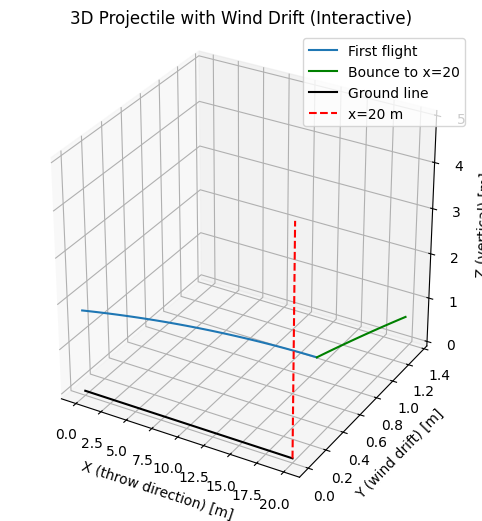

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Given initial parameters
y_0 = 1.8           # initial height (m)
theta_deg = -5.14   # launch angle in degrees (negative => downward)
v = 45.0            # initial speed (m/s)

# Wind speed in the y-direction
wind_speed = 3.0    # m/s (positive => ball drifts in +y)

# Convert angle to radians
theta_rad = np.radians(theta_deg)

# Initial velocities in x- and z- directions
v_x = v * np.cos(theta_rad)   # horizontal (x)
v_z = v * np.sin(theta_rad)   # vertical (z)

# --- FIRST TRAJECTORY ---

# Time until first ground contact (z=0)
discriminant = v_z**2 + 2*g*y_0
t_flight = (v_z + np.sqrt(discriminant)) / g

t = np.linspace(0, t_flight, num=100)

# x(t), y(t), z(t)
x_t = v_x * t
y_t = wind_speed * t
z_t = y_0 + v_z * t - 0.5*g*t**2
z_t[-1] = 0.0  # ensure exact landing

x_land = x_t[-1]
y_land = y_t[-1]
v_z_impact = v_z - g * t_flight

# --- BOUNCE TRAJECTORY ---

e = 0.8  # coefficient of restitution (vertical only)
v_z_bounce = - e * v_z_impact
v_x_bounce = v_x
v_y_bounce = wind_speed

x_stop = 20

if x_land < x_stop:
    T_stop = (x_stop - x_land) / v_x_bounce
    t2 = np.linspace(0, T_stop, num=50)
    
    x_bounce = x_land + v_x_bounce * t2
    y_bounce = y_land + v_y_bounce * t2
    z_bounce = 0.0 + (v_z_bounce * t2) - 0.5*g*t2**2
else:
    t2 = np.array([])
    x_bounce = np.array([])
    y_bounce = np.array([])
    z_bounce = np.array([])

# --- INTERACTIVE 3D PLOT ---

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the first trajectory
ax.plot(x_t, y_t, z_t, label="First flight")

# Plot the bounce trajectory
if len(t2) > 0:
    ax.plot(x_bounce, y_bounce, z_bounce, 'g', label="Bounce to x=20")

# Ground reference line (x from 0 to beyond 20, y=0, z=0)
ground_xmax = max(20, x_land)
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile with Wind Drift (Interactive)")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# Make the 3D box aspect ratio 1:1:1 (Matplotlib 3.3+)
ax.set_box_aspect((1,1,1))

plt.show()


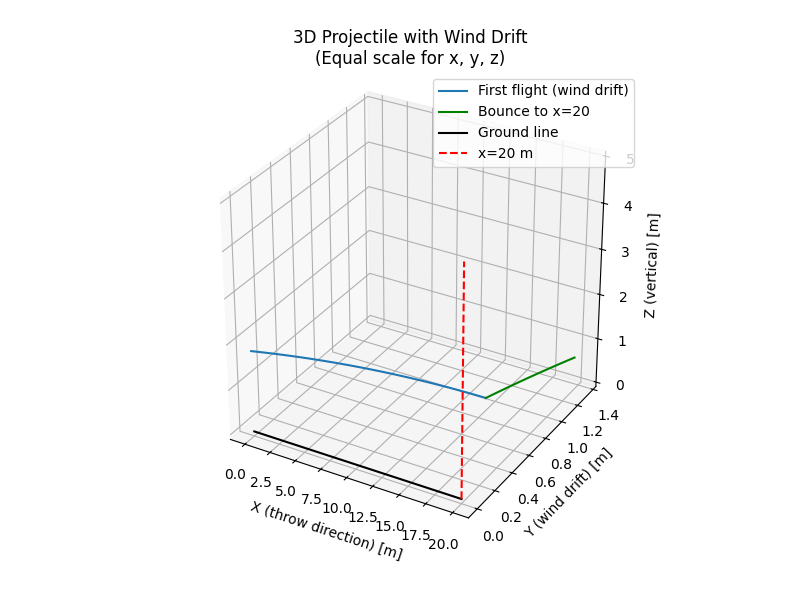

In [15]:

import matplotlib.pyplot as plt
# If you're in a Jupyter notebook and want the interactive toolbar, do:

import numpy as np

# Constants
g = 9.81  # m/s^2

# Initial conditions
y_0 = 1.8           # launch height (m)
theta_deg = -5.14   # launch angle in degrees (slightly downward)
v = 45.0            # initial throw speed (m/s)

# Wind speed in the y-direction (constant drift)
wind_speed = 3.0    # m/s

theta_rad = np.radians(theta_deg)

# Decompose the initial velocity into x and z (treating z as vertical)
v_x = v * np.cos(theta_rad)
v_z = v * np.sin(theta_rad)

# ---------------------------
# 1) FIRST TRAJECTORY
# ---------------------------
# z(t) = y_0 + v_z*t - 1/2*g*t^2
# x(t) = v_x*t
# y(t) = wind_speed*t  (drift)

discriminant = v_z**2 + 2*g*y_0
t_flight = (v_z + np.sqrt(discriminant)) / g  # positive root

t = np.linspace(0, t_flight, 100)
x_t = v_x * t
y_t = wind_speed * t
z_t = y_0 + v_z*t - 0.5*g*t**2
z_t[-1] = 0.0  # force exact landing on z=0

x_land = x_t[-1]
y_land = y_t[-1]
v_z_impact = v_z - g*t_flight  # vertical velocity just before impact

# ---------------------------
# 2) BOUNCE TRAJECTORY
# ---------------------------
# We'll apply a simple coefficient of restitution (vertical only).
e = 0.8
v_z_bounce = -e * v_z_impact  # reverses sign, scaled by e
v_x_bounce = v_x              # unchanged
v_y_bounce = wind_speed       # still drifting at constant wind speed

# We'll plot until x=20
x_stop = 20

if x_land < x_stop:
    T_stop = (x_stop - x_land) / v_x_bounce
    t2 = np.linspace(0, T_stop, 50)
    
    x_bounce = x_land + v_x_bounce * t2
    y_bounce = y_land + v_y_bounce * t2
    z_bounce = 0.0 + (v_z_bounce*t2) - 0.5*g*t2**2
else:
    t2 = np.array([])
    x_bounce = np.array([])
    y_bounce = np.array([])
    z_bounce = np.array([])

# ---------------------------
# 3) 3D PLOTTING
# ---------------------------
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot the first flight
ax.plot(x_t, y_t, z_t, label="First flight (wind drift)")

# Plot the bounce trajectory (if any)
if len(t2) > 0:
    ax.plot(x_bounce, y_bounce, z_bounce, 'g', label="Bounce to x=20")

# Draw a ground reference line (z=0, y=0)
ground_xmax = max(20, x_land)
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile with Wind Drift\n(Equal scale for x, y, z)")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# >>> Enforce a 1:1:1 aspect ratio in 3D <<<
ax.set_box_aspect((1, 1, 1))

plt.show()


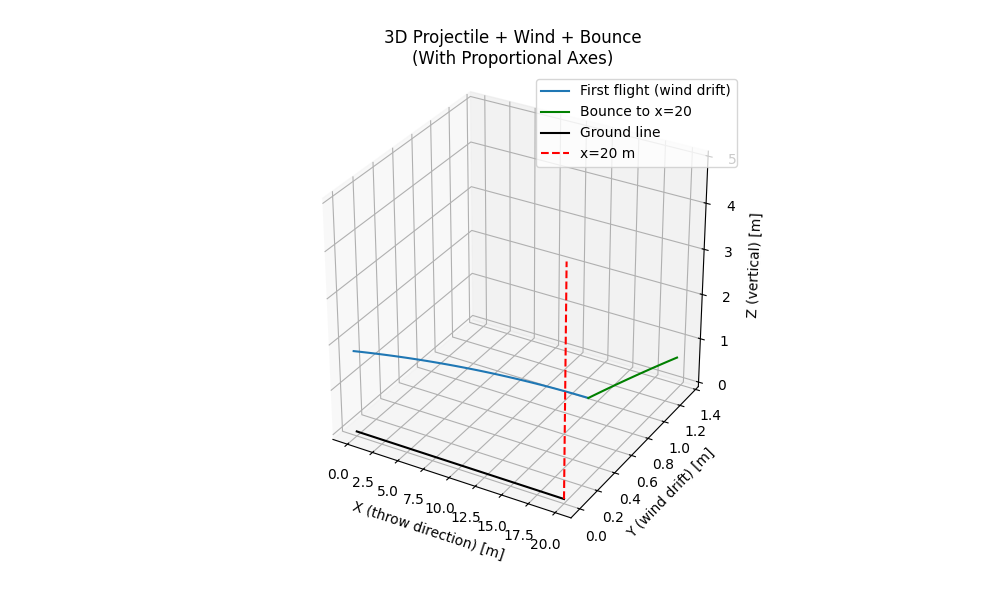

In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Initial parameters
y_0 = 1.8           # launch height (m)
theta_deg = -5.14   # launch angle in degrees (negative => slightly downward)
v = 45.0            # initial speed (m/s)

# Wind speed in y-direction (constant drift)
wind_speed = 3.0    # m/s

# Convert launch angle to radians
theta_rad = np.radians(theta_deg)

# Decompose the initial velocity into x (horizontal) and z (vertical)
v_x = v * np.cos(theta_rad)
v_z = v * np.sin(theta_rad)

# ---------------------------
# 1) FIRST TRAJECTORY
# ---------------------------
#
# z(t) = y_0 + v_z*t - 0.5*g*t^2
# x(t) = v_x*t
# y(t) = wind_speed*t  (sideways drift)

# Solve time to when the ball first returns to z=0
discriminant = v_z**2 + 2*g*y_0
t_flight = (v_z + np.sqrt(discriminant)) / g  # positive root

t = np.linspace(0, t_flight, num=100)

x_t = v_x * t
y_t = wind_speed * t
z_t = y_0 + v_z*t - 0.5*g*t**2

# Force the last z-value to be exactly 0
z_t[-1] = 0.0

# Where it lands (x,y) on the ground
x_land = x_t[-1]
y_land = y_t[-1]

# Vertical velocity at impact
v_z_impact = v_z - g*t_flight

# ---------------------------
# 2) BOUNCE TRAJECTORY
# ---------------------------
# Simple coefficient of restitution on z only
e = 0.8
v_z_bounce = -e * v_z_impact
v_x_bounce = v_x
v_y_bounce = wind_speed  # wind remains constant

# We plot until x=20
x_stop = 20

if x_land < x_stop:
    T_stop = (x_stop - x_land) / v_x_bounce
    t2 = np.linspace(0, T_stop, num=50)

    x_bounce = x_land + v_x_bounce * t2
    y_bounce = y_land + v_y_bounce * t2
    z_bounce = 0.0 + v_z_bounce*t2 - 0.5*g*t2**2
else:
    t2 = np.array([])
    x_bounce = np.array([])
    y_bounce = np.array([])
    z_bounce = np.array([])

# ---------------------------
# 3) 3D PLOTTING
# ---------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot first flight
ax.plot(x_t, y_t, z_t, label="First flight (wind drift)")

# Plot bounce
if len(t2) > 0:
    ax.plot(x_bounce, y_bounce, z_bounce, 'g', label="Bounce to x=20")

# Ground reference line
ground_xmax = max(20, x_land)
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile + Wind + Bounce\n(With Proportional Axes)")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# >>> Force a 1:1:1 aspect ratio <<<
ax.set_box_aspect((1, 1, 1))

plt.show()


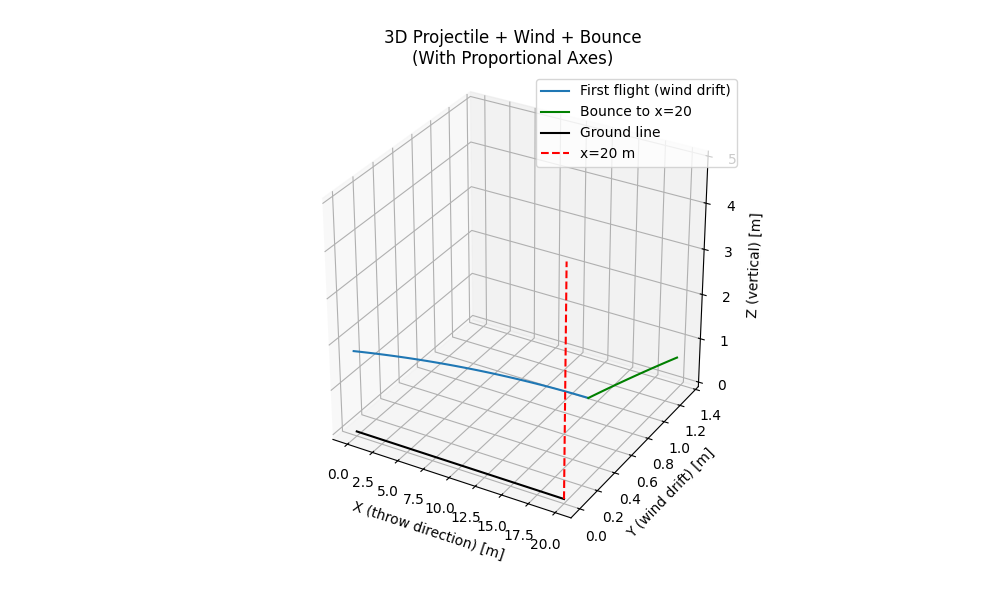

In [7]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2

# Initial parameters
y_0 = 1.8           # launch height (m)
theta_deg = -5.14   # launch angle in degrees (negative => slightly downward)
v = 45.0            # initial speed (m/s)

# Wind speed in y-direction (constant drift)
wind_speed = 3.0    # m/s

# Convert launch angle to radians
theta_rad = np.radians(theta_deg)

# Decompose the initial velocity into x (horizontal) and z (vertical)
v_x = v * np.cos(theta_rad)
v_z = v * np.sin(theta_rad)

# ---------------------------
# 1) FIRST TRAJECTORY
# ---------------------------
#
# z(t) = y_0 + v_z*t - 0.5*g*t^2
# x(t) = v_x*t
# y(t) = wind_speed*t  (sideways drift)

# Solve time to when the ball first returns to z=0
discriminant = v_z**2 + 2*g*y_0
t_flight = (v_z + np.sqrt(discriminant)) / g  # positive root

t = np.linspace(0, t_flight, num=100)

x_t = v_x * t
y_t = wind_speed * t
z_t = y_0 + v_z*t - 0.5*g*t**2

# Force the last z-value to be exactly 0
z_t[-1] = 0.0

# Where it lands (x,y) on the ground
x_land = x_t[-1]
y_land = y_t[-1]

# Vertical velocity at impact
v_z_impact = v_z - g*t_flight

# ---------------------------
# 2) BOUNCE TRAJECTORY
# ---------------------------
# Simple coefficient of restitution on z only
e = 0.8
v_z_bounce = -e * v_z_impact
v_x_bounce = v_x
v_y_bounce = wind_speed  # wind remains constant

# We plot until x=20
x_stop = 20

if x_land < x_stop:
    T_stop = (x_stop - x_land) / v_x_bounce
    t2 = np.linspace(0, T_stop, num=50)

    x_bounce = x_land + v_x_bounce * t2
    y_bounce = y_land + v_y_bounce * t2
    z_bounce = 0.0 + v_z_bounce*t2 - 0.5*g*t2**2
else:
    t2 = np.array([])
    x_bounce = np.array([])
    y_bounce = np.array([])
    z_bounce = np.array([])

# ---------------------------
# 3) 3D PLOTTING
# ---------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot first flight
ax.plot(x_t, y_t, z_t, label="First flight (wind drift)")

# Plot bounce
if len(t2) > 0:
    ax.plot(x_bounce, y_bounce, z_bounce, 'g', label="Bounce to x=20")

# Ground reference line
ground_xmax = max(20, x_land)
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile + Wind + Bounce\n(With Proportional Axes)")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# >>> Force a 1:1:1 aspect ratio <<<
ax.set_box_aspect((1, 1, 1))

plt.show()


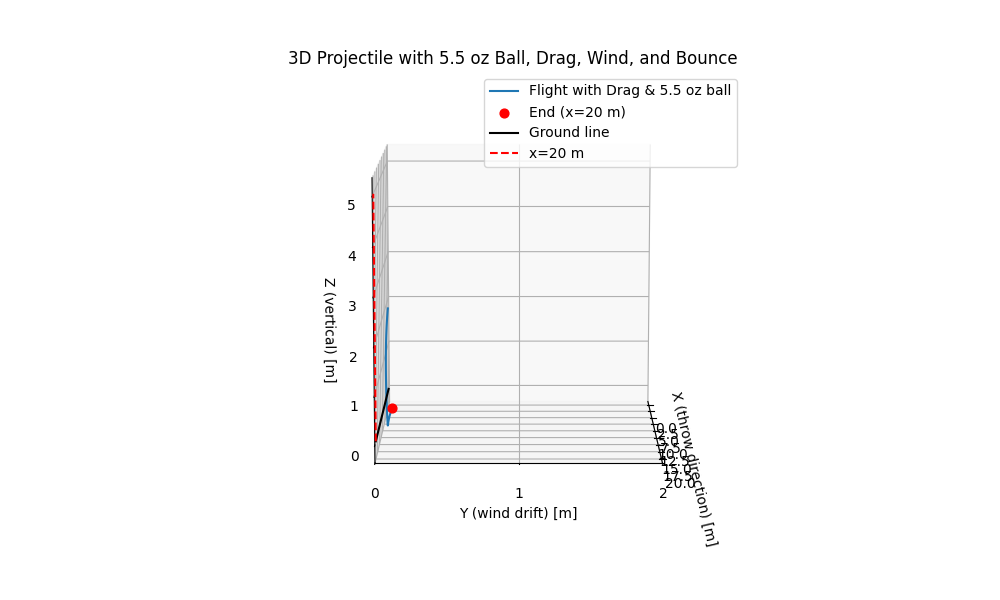

In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, mpld3

# -------------------------------------------------------------
# 1) PHYSICAL CONSTANTS & BALL PARAMETERS
# -------------------------------------------------------------
g = 9.81       # gravity (m/s^2)
rho = 1.225    # air density (kg/m^3) at sea level

# Convert weight (in ounces) to mass (in kg).
# 1 ounce ≈ 28.3495 grams => 5.5 oz ≈ 5.5 * 28.3495 = ~155.92 g = 0.156 kg
m = 0.156      # mass of the ball in kg (approx for 5.5 oz)

# For a roughly spherical ball, pick some typical drag parameters:
C_d = 0.5      # drag coefficient (dimensionless)
A   = 0.004    # cross-sectional area (m^2), e.g. ~π*(0.036^2) for ~36 mm radius

# Wind speed in +y (m/s)
wind_speed = 3.0  

# Coefficient of restitution for ground bounce
e = 0.8

# -------------------------------------------------------------
# 2) INITIAL LAUNCH PARAMETERS
# -------------------------------------------------------------
y_0       = 1.8       # launch height (m)
theta_deg = -5.14      # launch angle in degrees (slightly downward)
v_init    = 45.0       # launch speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0  # no initial side velocity; wind is handled via drag
v_z0 = v_init * np.sin(theta_rad)

# Starting position
x0, y0, z0 = 0.0, 0.0, y_0

# We will stop plotting at x=20 m
x_stop = 20

# -------------------------------------------------------------
# 3) TIME-STEPPING PARAMETERS
# -------------------------------------------------------------
dt    = 0.01  # time step (s)
t_max = 10.0  # max time to simulate (s)

# -------------------------------------------------------------
# 4) ARRAYS FOR STORING THE TRAJECTORY
# -------------------------------------------------------------
t_vals = []
x_vals = []
y_vals = []
z_vals = []

# -------------------------------------------------------------
# 5) EULER INTEGRATION WITH DRAG + WIND + BOUNCE
# -------------------------------------------------------------
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    # Record current state
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # ------ Relative velocity for drag (wind in +y) ------
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # ------ Drag Force ------
    # Magnitude: 0.5 * rho * C_d * A * v_rel^2
    # Direction: opposite to velocity
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x, F_drag_y, F_drag_z = 0.0, 0.0, 0.0
    
    # ------ Net Forces ------
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z  # gravity + drag
    
    # ------ Accelerations ------
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # ------ Update velocities (Euler) ------
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # ------ Update positions (Euler) ------
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    
    t_cur += dt
    
    # ------ Ground bounce if z < 0 ------
    if z_cur <= 0.0:
        # If we just crossed from above ground:
        if z_old > 0.0:
            z_cur = 0.0
            # Reverse & reduce the vertical velocity
            vz_cur = -e * vz_cur
        # If still below ground, keep it at z=0
        if z_cur < 0.0:
            z_cur = 0.0

    # ------ Stop if x >= x_stop ------
    if x_cur >= x_stop:
        x_cur = x_stop
        # Save the final point at x=20
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# -------------------------------------------------------------
# 6) 3D PLOTTING
# -------------------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_vals, y_vals, z_vals, label="Flight with Drag & 5.5 oz ball")
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1],
           color='red', s=40, label="End (x=20 m)")

# Ground reference line
ground_xmax = max(x_stop, max(x_vals))
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile with 5.5 oz Ball, Drag, Wind, and Bounce")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

ax.set_ylim3d(0, 2)
ax.set_yticks(np.arange(0, 3, 1))

# Force 1:1:1 aspect ratio
ax.set_box_aspect((1, 1, 1))
ax.view_init(elev=10, azim=0)


plt.show()


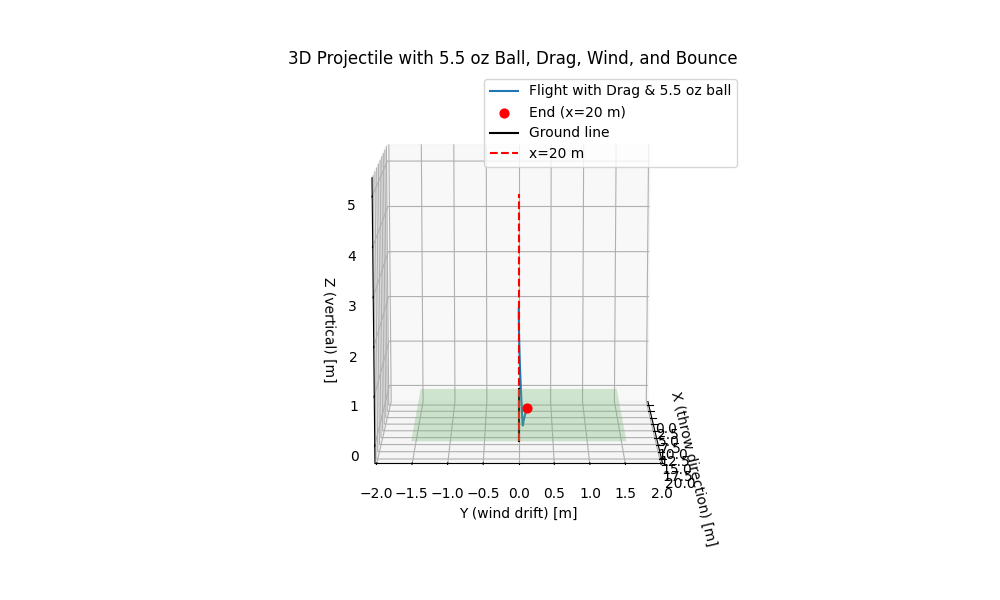

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, mpld3

# -------------------------------------------------------------
# 1) PHYSICAL CONSTANTS & BALL PARAMETERS
# -------------------------------------------------------------
g = 9.81       # gravity (m/s^2)
rho = 1.225    # air density (kg/m^3) at sea level
m = 0.156      # mass of the ball in kg (approx for 5.5 oz)
C_d = 0.5      # drag coefficient (dimensionless)
A   = 0.004    # cross-sectional area (m^2)
wind_speed = 3.0   # wind in +y direction (m/s)
e = 0.8        # coefficient of restitution

# -------------------------------------------------------------
# 2) INITIAL LAUNCH PARAMETERS
# -------------------------------------------------------------
y_0       = 1.8       # launch height (m)
theta_deg = -5.14      # launch angle in degrees
v_init    = 45.0       # launch speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0  
v_z0 = v_init * np.sin(theta_rad)

x0, y0, z0 = 0.0, 0.0, y_0  # Starting position
x_stop     = 20            # We'll stop plotting at x=20 m

# -------------------------------------------------------------
# 3) TIME-STEPPING PARAMETERS
# -------------------------------------------------------------
dt    = 0.01  # time step (s)
t_max = 10.0  # max time to simulate (s)

# -------------------------------------------------------------
# 4) ARRAYS FOR STORING THE TRAJECTORY
# -------------------------------------------------------------
t_vals = []
x_vals = []
y_vals = []
z_vals = []

# -------------------------------------------------------------
# 5) EULER INTEGRATION WITH DRAG + WIND + BOUNCE
# -------------------------------------------------------------
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    # Record current state
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # -- Relative velocity for drag (wind in +y) --
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # -- Drag Force --
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x, F_drag_y, F_drag_z = 0.0, 0.0, 0.0
    
    # -- Net Forces --
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z  # gravity + drag
    
    # -- Accelerations --
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # -- Update velocities (Euler) --
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # -- Update positions (Euler) --
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    
    t_cur += dt
    
    # -- Ground bounce if z < 0 --
    if z_cur <= 0.0:
        if z_old > 0.0:
            z_cur = 0.0
            vz_cur = -e * vz_cur
        if z_cur < 0.0:
            z_cur = 0.0

    # -- Stop if x >= x_stop --
    if x_cur >= x_stop:
        x_cur = x_stop
        # Save the final point at x=20
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# -------------------------------------------------------------
# 6) 3D PLOTTING
# -------------------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# -- Draw the light-green rectangular patch on the ground (z=0),
#    centered at y=0, with total width = 3.05 m (±1.525 m in y).
width = 3.05
ymin = -width/2
ymax =  width/2

# Create a 2x2 mesh for the rectangle corners
X_rect, Y_rect = np.meshgrid([0, x_stop], [ymin, ymax])
Z_rect = np.zeros_like(X_rect)  # z=0 for the entire patch

# Plot the surface as a light-green patch
ax.plot_surface(X_rect, Y_rect, Z_rect, color='lightgreen', alpha=0.3)

# -- Plot the actual trajectory --
ax.plot(x_vals, y_vals, z_vals, label="Flight with Drag & 5.5 oz ball")
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1],
           color='red', s=40, label="End (x=20 m)")

# Ground reference line
ground_xmax = max(x_stop, max(x_vals))
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile with 5.5 oz Ball, Drag, Wind, and Bounce")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# Adjust the y-limits so we can see the ±1.525 m region
ax.set_ylim3d(ymin - 0.5, ymax + 0.5)

# Force 1:1:1 aspect ratio and adjust the view angle
ax.set_box_aspect((1, 1, 1))
ax.view_init(elev=10, azim=0)

plt.show()


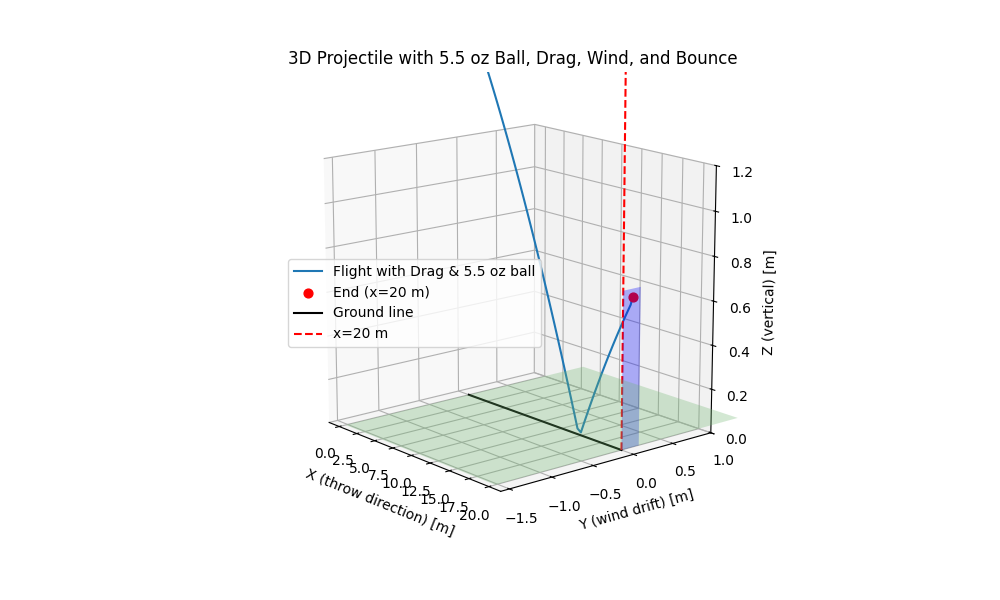

In [8]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, mpld3

# -------------------------------------------------------------
# 1) PHYSICAL CONSTANTS & BALL PARAMETERS
# -------------------------------------------------------------
g = 9.81       # gravity (m/s^2)
rho = 1.225    # air density (kg/m^3) at sea level

m = 0.156      # mass of the ball in kg (approx for 5.5 oz)
C_d = 0.5      # drag coefficient (dimensionless)
A   = 0.004    # cross-sectional area (m^2)
wind_speed = 3.0   # wind in +y direction (m/s)
e = 0.8        # coefficient of restitution

# -------------------------------------------------------------
# 2) INITIAL LAUNCH PARAMETERS
# -------------------------------------------------------------
y_0       = 1.8       # launch height (m)
theta_deg = -5.14      # launch angle in degrees
v_init    = 45.0       # launch speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0  
v_z0 = v_init * np.sin(theta_rad)

x0, y0, z0 = 0.0, 0.0, y_0  # Starting position
x_stop     = 20            # We'll stop plotting at x=20 m

# -------------------------------------------------------------
# 3) TIME-STEPPING PARAMETERS
# -------------------------------------------------------------
dt    = 0.01  # time step (s)
t_max = 10.0  # max time to simulate (s)

# -------------------------------------------------------------
# 4) ARRAYS FOR STORING THE TRAJECTORY
# -------------------------------------------------------------
t_vals = []
x_vals = []
y_vals = []
z_vals = []

# -------------------------------------------------------------
# 5) EULER INTEGRATION WITH DRAG + WIND + BOUNCE
# -------------------------------------------------------------
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    # Record current state
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # -- Relative velocity for drag (wind in +y) --
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # -- Drag Force --
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x, F_drag_y, F_drag_z = 0.0, 0.0, 0.0
    
    # -- Net Forces --
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z  # gravity + drag
    
    # -- Accelerations --
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # -- Update velocities (Euler) --
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # -- Update positions (Euler) --
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    
    t_cur += dt
    
    # -- Ground bounce if z < 0 --
    if z_cur <= 0.0:
        if z_old > 0.0:
            z_cur = 0.0
            vz_cur = -e * vz_cur
        if z_cur < 0.0:
            z_cur = 0.0

    # -- Stop if x >= x_stop --
    if x_cur >= x_stop:
        x_cur = x_stop
        # Save the final point at x=20
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# -------------------------------------------------------------
# 6) 3D PLOTTING
# -------------------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# -------------------------------------------------------------
# (A) LIGHT-GREEN PATCH (x-y plane at z=0)
# -------------------------------------------------------------
width = 3.05
ymin = -width/2  # -1.525
ymax =  width/2  # +1.525

X_rect_xy, Y_rect_xy = np.meshgrid([0, x_stop], [ymin, ymax])
Z_rect_xy = np.zeros_like(X_rect_xy)  # z=0
ax.plot_surface(
    X_rect_xy, Y_rect_xy, Z_rect_xy,
    color='lightgreen',
    alpha=0.3
)

# -------------------------------------------------------------
# (B) TRANSPARENT BLUE PATCH (y-z plane at x=20)
# -------------------------------------------------------------
rect_width  = 0.2186  # 21.86 cm
rect_height = 0.71    # 71 cm

y_min = 0.0
y_max = rect_width
z_min = 0.0
z_max = rect_height

Y_rect_zy, Z_rect_zy = np.meshgrid([y_min, y_max], [z_min, z_max])
X_rect_zy = np.ones_like(Y_rect_zy) * x_stop  # 20

ax.plot_surface(
    X_rect_zy, Y_rect_zy, Z_rect_zy,
    color='blue',
    alpha=0.3,
    shade=False
)

# -------------------------------------------------------------
# (C) TRAJECTORY AND REFERENCE LINES
# -------------------------------------------------------------
ax.plot(x_vals, y_vals, z_vals, label="Flight with Drag & 5.5 oz ball")
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1],
           color='red', s=40, label="End (x=20 m)")

# Ground reference line
ground_xmax = max(x_stop, max(x_vals))
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile with 5.5 oz Ball, Drag, Wind, and Bounce")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# Adjust the axes so we can see everything:
# - y from ~-1.6 to +1.0 or so
# - z from 0 to ~1
ax.set_ylim3d(-1.6, 1.0)      # just an example range
ax.set_zlim3d(0.0, 1.2)       # so we can see that 0.71 patch

# Force 1:1:1 aspect ratio and adjust the view angle
ax.set_box_aspect((1, 1, 1))
ax.view_init(elev=15, azim=-40)

plt.show()


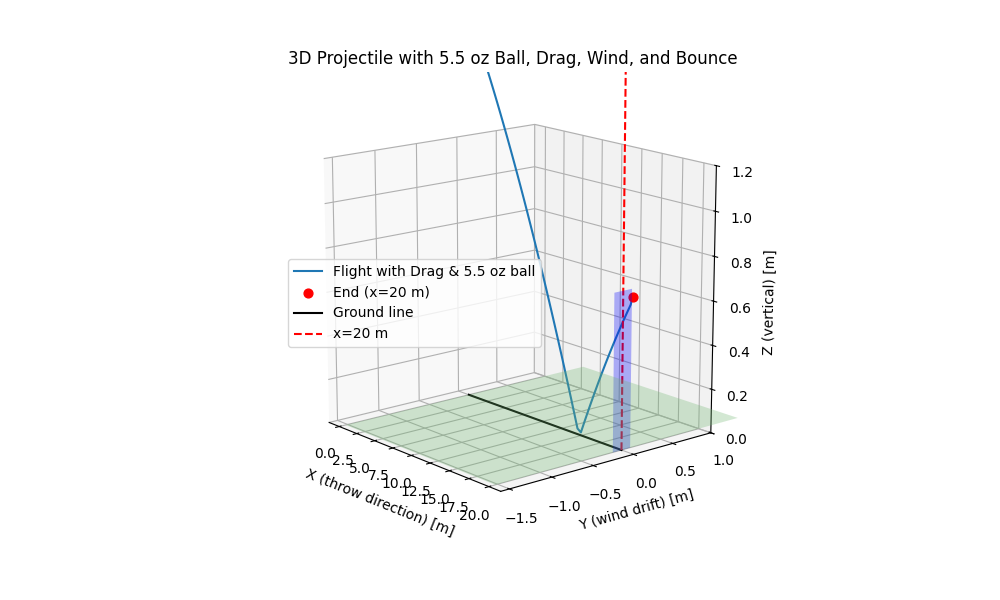

In [9]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, mpld3

# -------------------------------------------------------------
# 1) PHYSICAL CONSTANTS & BALL PARAMETERS
# -------------------------------------------------------------
g = 9.81       # gravity (m/s^2)
rho = 1.225    # air density (kg/m^3) at sea level

m = 0.156      # mass of the ball in kg (approx for 5.5 oz)
C_d = 0.5      # drag coefficient (dimensionless)
A   = 0.004    # cross-sectional area (m^2)
wind_speed = 3.0   # wind in +y direction (m/s)
e = 0.8        # coefficient of restitution

# -------------------------------------------------------------
# 2) INITIAL LAUNCH PARAMETERS
# -------------------------------------------------------------
y_0       = 1.8       # launch height (m)
theta_deg = -5.14      # launch angle in degrees
v_init    = 45.0       # launch speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0  
v_z0 = v_init * np.sin(theta_rad)

x0, y0, z0 = 0.0, 0.0, y_0  # Starting position
x_stop     = 20            # We'll stop plotting at x=20 m

# -------------------------------------------------------------
# 3) TIME-STEPPING PARAMETERS
# -------------------------------------------------------------
dt    = 0.01  # time step (s)
t_max = 10.0  # max time to simulate (s)

# -------------------------------------------------------------
# 4) ARRAYS FOR STORING THE TRAJECTORY
# -------------------------------------------------------------
t_vals = []
x_vals = []
y_vals = []
z_vals = []

# -------------------------------------------------------------
# 5) EULER INTEGRATION WITH DRAG + WIND + BOUNCE
# -------------------------------------------------------------
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    # Record current state
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # -- Relative velocity for drag (wind in +y) --
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # -- Drag Force --
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x, F_drag_y, F_drag_z = 0.0, 0.0, 0.0
    
    # -- Net Forces --
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z  # gravity + drag
    
    # -- Accelerations --
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # -- Update velocities (Euler) --
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # -- Update positions (Euler) --
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    
    t_cur += dt
    
    # -- Ground bounce if z < 0 --
    if z_cur <= 0.0:
        if z_old > 0.0:
            z_cur = 0.0
            vz_cur = -e * vz_cur
        if z_cur < 0.0:
            z_cur = 0.0

    # -- Stop if x >= x_stop --
    if x_cur >= x_stop:
        x_cur = x_stop
        # Save the final point at x=20
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# -------------------------------------------------------------
# 6) 3D PLOTTING
# -------------------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# -------------------------------------------------------------
# (A) LIGHT-GREEN PATCH (x-y plane at z=0)
# -------------------------------------------------------------
width = 3.05
ymin = -width / 2  # -1.525
ymax =  width / 2  # +1.525

X_rect_xy, Y_rect_xy = np.meshgrid([0, x_stop], [ymin, ymax])
Z_rect_xy = np.zeros_like(X_rect_xy)  # z=0
ax.plot_surface(
    X_rect_xy, Y_rect_xy, Z_rect_xy,
    color='lightgreen',
    alpha=0.3
)

# -------------------------------------------------------------
# (B) TRANSPARENT BLUE PATCH (y–z plane at x=20, centered around y=0)
# -------------------------------------------------------------
rect_width  = 0.2186  # 21.86 cm => half => 0.1093
rect_height = 0.71    # 71 cm

# Center around y=0, so go ± half-width
y_min = -rect_width / 2  # -0.1093
y_max = +rect_width / 2  # +0.1093

z_min = 0.0
z_max = rect_height

Y_rect_zy, Z_rect_zy = np.meshgrid([y_min, y_max], [z_min, z_max])
X_rect_zy = np.ones_like(Y_rect_zy) * x_stop  # 20

ax.plot_surface(
    X_rect_zy, Y_rect_zy, Z_rect_zy,
    color='blue',
    alpha=0.3,
    shade=False
)

# -------------------------------------------------------------
# (C) TRAJECTORY AND REFERENCE LINES
# -------------------------------------------------------------
ax.plot(x_vals, y_vals, z_vals, label="Flight with Drag & 5.5 oz ball")
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1],
           color='red', s=40, label="End (x=20 m)")

# Ground reference line
ground_xmax = max(x_stop, max(x_vals))
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile with 5.5 oz Ball, Drag, Wind, and Bounce")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# Adjust the axes so we can see everything:
#   - y from ~-1.6 to +1.0 or so
#   - z from 0 to ~1
ax.set_ylim3d(-1.6, 1.0)      
ax.set_zlim3d(0.0, 1.2)      

# Force 1:1:1 aspect ratio and adjust the view angle
ax.set_box_aspect((1, 1, 1))
ax.view_init(elev=15, azim=-40)

plt.show()


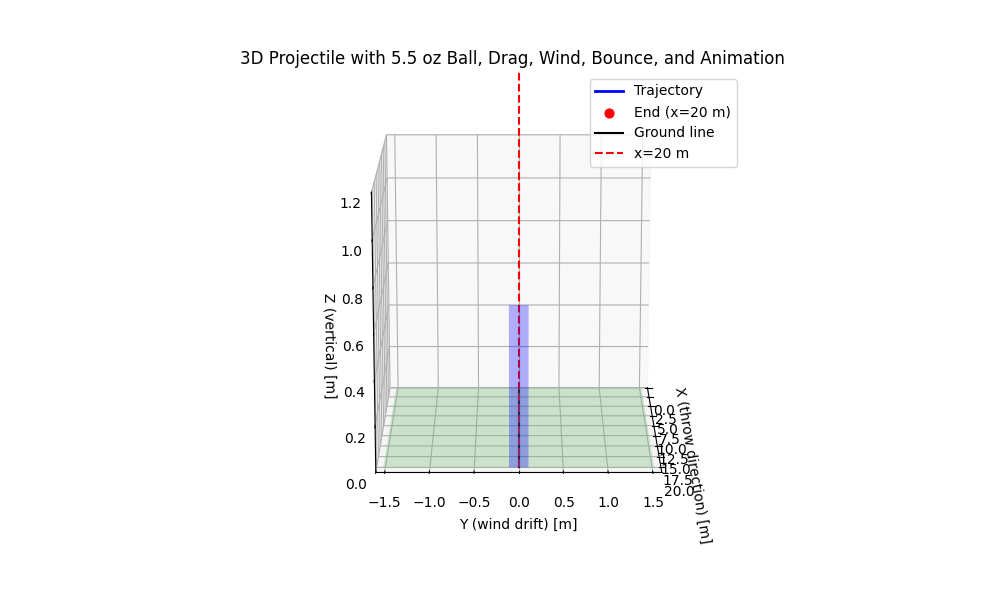

In [10]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# -------------------------------------------------------------
# 1) PHYSICAL CONSTANTS & BALL PARAMETERS
# -------------------------------------------------------------
g = 9.81       # gravity (m/s^2)
rho = 1.225    # air density (kg/m^3) at sea level

m = 0.156      # mass of the ball in kg (approx for 5.5 oz)
C_d = 0.5      # drag coefficient (dimensionless)
A   = 0.004    # cross-sectional area (m^2)
wind_speed = 4.0   # wind in +y direction (m/s)
e = 0.58       # coefficient of restitution

# -------------------------------------------------------------
# 2) INITIAL LAUNCH PARAMETERS
# -------------------------------------------------------------
y_0       = 1.5       # launch height (m)
theta_deg = -7.14      # launch angle in degrees
v_init    = 45.0       # launch speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0  
v_z0 = v_init * np.sin(theta_rad)

x0, y0, z0 = 0.0, 0.0, y_0  # Starting position
x_stop     = 20            # We'll stop plotting at x=20 m

# -------------------------------------------------------------
# 3) TIME-STEPPING PARAMETERS
# -------------------------------------------------------------
dt    = 0.01  # time step (s)
t_max = 10.0  # max time to simulate (s)

# -------------------------------------------------------------
# 4) ARRAYS FOR STORING THE TRAJECTORY
# -------------------------------------------------------------
t_vals = []
x_vals = []
y_vals = []
z_vals = []

# -------------------------------------------------------------
# 5) EULER INTEGRATION WITH DRAG + WIND + BOUNCE
# -------------------------------------------------------------
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    # Record current state
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # -- Relative velocity for drag (wind in +y) --
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # -- Drag Force --
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x, F_drag_y, F_drag_z = 0.0, 0.0, 0.0
    
    # -- Net Forces --
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z  # gravity + drag
    
    # -- Accelerations --
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # -- Update velocities (Euler) --
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # -- Update positions (Euler) --
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    
    t_cur += dt
    
    # -- Ground bounce if z < 0 --
    if z_cur <= 0.0:
        if z_old > 0.0:
            z_cur = 0.0
            vz_cur = -e * vz_cur
        if z_cur < 0.0:
            z_cur = 0.0

    # -- Stop if x >= x_stop --
    if x_cur >= x_stop:
        x_cur = x_stop
        # Save the final point at x=20
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# -------------------------------------------------------------
# Convert lists to NumPy arrays (helps slicing when animating)
# -------------------------------------------------------------
x_arr = np.array(x_vals)
y_arr = np.array(y_vals)
z_arr = np.array(z_vals)
t_arr = np.array(t_vals)

# -------------------------------------------------------------
# 6) 3D PLOTTING (STATIC ELEMENTS)
# -------------------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# (A) LIGHT-GREEN PATCH (x-y plane at z=0)
width = 3.05
ymin = -width/2  # -1.525
ymax =  width/2  # +1.525

X_rect_xy, Y_rect_xy = np.meshgrid([0, x_stop], [ymin, ymax])
Z_rect_xy = np.zeros_like(X_rect_xy)  # z=0
ax.plot_surface(
    X_rect_xy, Y_rect_xy, Z_rect_xy,
    color='lightgreen',
    alpha=0.3
)

# (B) TRANSPARENT BLUE PATCH (y–z plane at x=20, centered around y=0)
rect_width  = 0.2186  # 21.86 cm => half => 0.1093
rect_height = 0.71    # 71 cm

y_min = -rect_width / 2  # -0.1093
y_max =  rect_width / 2  # +0.1093
z_min = 0.0
z_max = rect_height

Y_rect_zy, Z_rect_zy = np.meshgrid([y_min, y_max], [z_min, z_max])
X_rect_zy = np.ones_like(Y_rect_zy) * x_stop  # x=20

ax.plot_surface(
    X_rect_zy, Y_rect_zy, Z_rect_zy,
    color='blue',
    alpha=0.3,
    shade=False
)

# -------------------------------------------------------------
# 7) PREP FOR ANIMATION (DYNAMIC ELEMENTS)
# -------------------------------------------------------------
# We'll animate a single line for the projectile's path
traj_line, = ax.plot([], [], [], lw=2, color='blue', label="Trajectory")

# (Optional) We can keep a final scatter point that doesn't move
final_point = ax.scatter([], [], [], color='red', s=40, label="End (x=20 m)")

# A ground reference line
ground_xmax = max(x_stop, np.max(x_arr))
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")

# Optional vertical line at x=20
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_title("3D Projectile with 5.5 oz Ball, Drag, Wind, Bounce, and Animation")
ax.set_xlabel("X (throw direction) [m]")
ax.set_ylabel("Y (wind drift) [m]")
ax.set_zlabel("Z (vertical) [m]")
ax.legend()

# Adjust the axes so we can see everything
ax.set_xlim3d(0.0, 21.0)  # for x
ax.set_ylim3d(-1.6, 1.6)  # for y
ax.set_zlim3d(0.0, 1.2)   # for z

# Force 1:1:1 aspect ratio and adjust the view angle
ax.set_box_aspect((1, 1, 1))
#ax.view_init(elev=15, azim=-40)
ax.view_init(elev=15, azim=0)

# -------------------------------------------------------------
# 8) CREATE ANIMATION FUNCTIONS
# -------------------------------------------------------------
def init_animation():
    """Clear the line and final point at start."""
    traj_line.set_data([], [])
    traj_line.set_3d_properties([])
    final_point._offsets3d = ([], [], [])
    return traj_line, final_point

def update_animation(frame):
    """
    For the current 'frame' index, update the
    projectile line from 0..frame.
    """
    # Update the trajectory line
    traj_line.set_data(x_arr[:frame], y_arr[:frame])
    traj_line.set_3d_properties(z_arr[:frame])

    # Update the final red point (only if the frame is large enough)
    if frame > 0:
        final_point._offsets3d = (
            [x_arr[frame-1]],
            [y_arr[frame-1]],
            [z_arr[frame-1]]
        )
    else:
        final_point._offsets3d = ([], [], [])

    return traj_line, final_point

# -------------------------------------------------------------
# 9) RUN THE ANIMATION
# -------------------------------------------------------------
frames_total = len(t_arr)  # or just use len(x_arr)
ani = FuncAnimation(
    fig,
    update_animation,
    repeat=False,
    frames=frames_total,
    init_func=init_animation,
    interval=100,    # ms between frames (~50 fps)
    blit=False      # 3D + patches => often better with blit=False
)

plt.show()


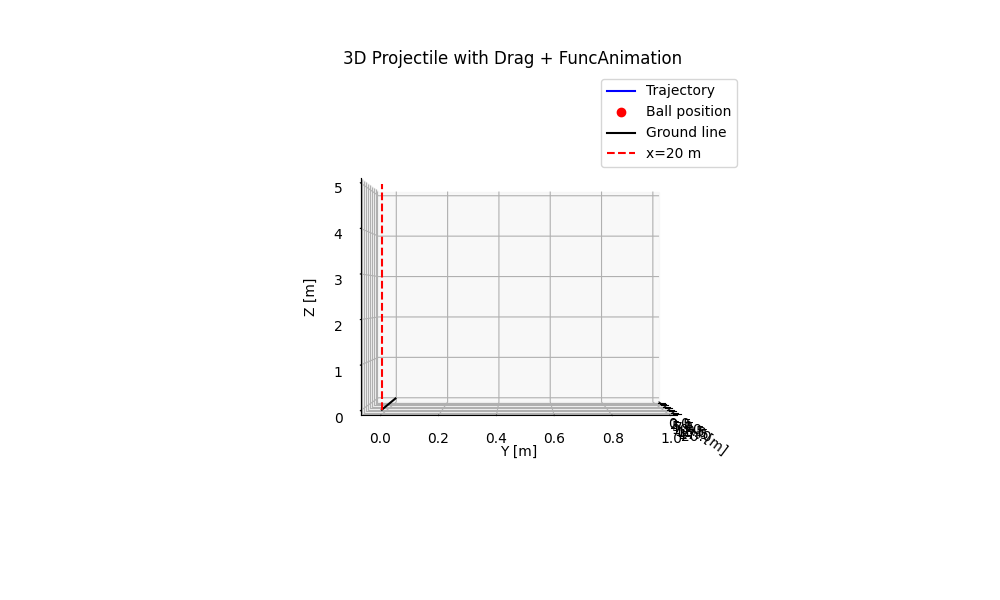

In [11]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ------------------------------------------------
# 1) PHYSICAL CONSTANTS & PARAMETERS
# ------------------------------------------------
g = 9.81      # gravitational acceleration (m/s^2)
rho = 1.225   # air density (kg/m^3) at sea level

# For a roughly spherical ball
m   = 0.156   # mass (kg) ~5.5 oz
C_d = 0.5     # drag coefficient (dimensionless)
A   = 0.004   # cross-sectional area (m^2)

wind_speed = 3.0  # +y direction (m/s)
e = 0.8           # coefficient of restitution with ground

# ------------------------------------------------
# 2) INITIAL CONDITIONS
# ------------------------------------------------
y_0       = 1.8       # launch height (m)
theta_deg = -5.14      # slight downward angle
v_init    = 45.0       # initial speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0
v_z0 = v_init * np.sin(theta_rad)

x0, y0, z0 = 0.0, 0.0, y_0

# We'll stop plotting at x=20 m
x_stop = 20.0

# ------------------------------------------------
# 3) TIME-STEPPING & TRAJECTORY STORAGE
# ------------------------------------------------
dt    = 0.01
t_max = 10.0

# Arrays to store the entire trajectory (so we can animate it)
t_vals = []
x_vals = []
y_vals = []
z_vals = []

# Euler integration loop
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # Relative velocity (wind in +y)
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # Drag force
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x, F_drag_y, F_drag_z = 0.0, 0.0, 0.0
    
    # Net forces
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z
    
    # Accelerations
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # Update velocities
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # Update positions
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    t_cur += dt
    
    # Bounce if below ground
    if z_cur <= 0.0:
        if z_old > 0.0:
            z_cur = 0.0
            vz_cur = -e * vz_cur
        if z_cur < 0.0:
            z_cur = 0.0
    
    # Stop at x=20
    if x_cur >= x_stop:
        x_cur = x_stop
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# Convert to NumPy arrays
t_vals = np.array(t_vals)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
z_vals = np.array(z_vals)

# ------------------------------------------------
# 4) SETUP FIGURE & 3D AXES
# ------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("3D Projectile with Drag + FuncAnimation")
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")

# We will create a line object that we update incrementally
line, = ax.plot([], [], [], 'b', label="Trajectory")
point, = ax.plot([], [], [], 'ro', label="Ball position")

# Some reference lines
ground_xmax =  max(x_stop, x_vals.max())
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.legend()
ax.view_init(elev=0, azim=0)

# Optionally set a 1:1:1 aspect ratio
#ax.set_box_aspect((1,1,1))

# ------------------------------------------------
# 5) INIT & UPDATE FUNCTIONS FOR ANIMATION
# ------------------------------------------------
def init_func():
    """
    Initialize the line and point to empty data.
    """
    line.set_data([], [])
    line.set_3d_properties([])
    
    point.set_data([], [])
    point.set_3d_properties([])
    
    return line, point

def update_func(frame):
    """
    For each frame, we show x_vals[:frame], etc.
    """
    # Up to the current frame index
    x_data = x_vals[:frame]
    y_data = y_vals[:frame]
    z_data = z_vals[:frame]
    
    line.set_data(x_data, y_data)
    line.set_3d_properties(z_data)
    
    # Current point
    if frame > 0:
        x_now = x_vals[frame-1]
        y_now = y_vals[frame-1]
        z_now = z_vals[frame-1]
        point.set_data([x_now], [y_now])
        point.set_3d_properties([z_now])
    
    # Optionally adjust the view in real time if you like
    # e.g. ax.view_init(elev=20, azim=frame)
    # But that can cause slow rendering for 3D

    return line, point

# ------------------------------------------------
# 6) CREATE ANIMATION
# ------------------------------------------------
frames_total = len(t_vals)  # We have one frame per time-step

ani = FuncAnimation(
    fig,
    update_func,
    repeat=False,
    frames=frames_total,
    init_func=init_func,
    interval=100,       # time in ms between frames (tweak as needed)
    blit=False         # blitting can be tricky with 3D
)

plt.show()


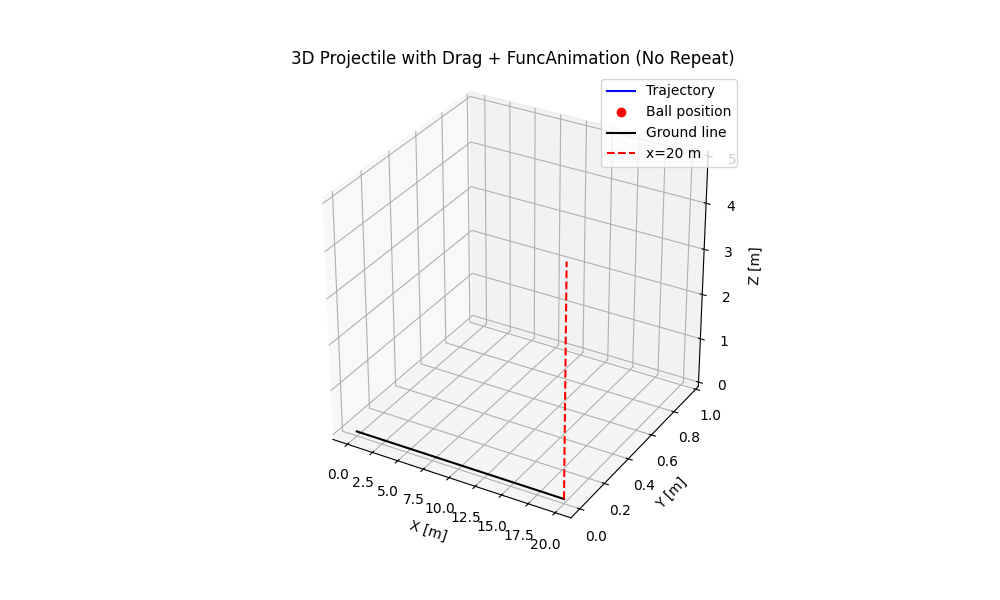

In [12]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ------------------------------------------------
# 1) PHYSICAL CONSTANTS & PARAMETERS
# ------------------------------------------------
g = 9.81      # gravitational acceleration (m/s^2)
rho = 1.225   # air density (kg/m^3) at sea level

# For a roughly spherical ball
m   = 0.156   # mass (kg) ~5.5 oz
C_d = 0.5     # drag coefficient (dimensionless)
A   = 0.004   # cross-sectional area (m^2)

wind_speed = 3.0  # +y direction (m/s)
e = 0.8           # coefficient of restitution with ground

# ------------------------------------------------
# 2) INITIAL CONDITIONS
# ------------------------------------------------
y_0       = 1.8       # launch height (m)
theta_deg = -5.14      # slight downward angle
v_init    = 45.0       # initial speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0
v_z0 = v_init * np.sin(theta_rad)

x0, y0, z0 = 0.0, 0.0, y_0

# We'll stop plotting at x=20 m
x_stop = 20.0

# ------------------------------------------------
# 3) TIME-STEPPING & TRAJECTORY STORAGE
# ------------------------------------------------
dt    = 0.01
t_max = 10.0

# Arrays to store the entire trajectory (so we can animate it)
t_vals = []
x_vals = []
y_vals = []
z_vals = []

# Euler integration loop
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # Relative velocity (wind in +y)
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # Drag force
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x, F_drag_y, F_drag_z = 0.0, 0.0, 0.0
    
    # Net forces
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z
    
    # Accelerations
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # Update velocities
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # Update positions
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    t_cur += dt
    
    # Bounce if below ground
    if z_cur <= 0.0:
        if z_old > 0.0:
            z_cur = 0.0
            vz_cur = -e * vz_cur
        if z_cur < 0.0:
            z_cur = 0.0
    
    # Stop at x=20
    if x_cur >= x_stop:
        x_cur = x_stop
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# Convert to NumPy arrays
t_vals = np.array(t_vals)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
z_vals = np.array(z_vals)

# ------------------------------------------------
# 4) SETUP FIGURE & 3D AXES
# ------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("3D Projectile with Drag + FuncAnimation (No Repeat)")
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")

# We will create a line object that we update incrementally
line, = ax.plot([], [], [], 'b', label="Trajectory")
point, = ax.plot([], [], [], 'ro', label="Ball position")

# Some reference lines
ground_xmax = max(x_stop, x_vals.max())
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.legend()

# Optionally set a 1:1:1 aspect ratio
ax.set_box_aspect((1,1,1))

# ------------------------------------------------
# 5) INIT & UPDATE FUNCTIONS FOR ANIMATION
# ------------------------------------------------
def init_func():
    """
    Initialize the line and point to empty data.
    """
    line.set_data([], [])
    line.set_3d_properties([])
    
    point.set_data([], [])
    point.set_3d_properties([])
    
    return line, point

def update_func(frame):
    """
    For each frame, we show up to x_vals[:frame].
    """
    # Up to the current frame index
    x_data = x_vals[:frame]
    y_data = y_vals[:frame]
    z_data = z_vals[:frame]
    
    line.set_data(x_data, y_data)
    line.set_3d_properties(z_data)
    
    # Current point
    if frame > 0:
        x_now = x_vals[frame-1]
        y_now = y_vals[frame-1]
        z_now = z_vals[frame-1]
        point.set_data([x_now], [y_now])
        point.set_3d_properties([z_now])
    
    return line, point

# ------------------------------------------------
# 6) CREATE ANIMATION (NO REPEAT)
# ------------------------------------------------
frames_total = len(t_vals)

ani = FuncAnimation(
    fig,
    update_func,
    frames=frames_total,
    init_func=init_func,
    interval=20,   # ms between frames (~50 FPS)
    blit=False,
    repeat=False   # <-- Will NOT loop
)

plt.show()


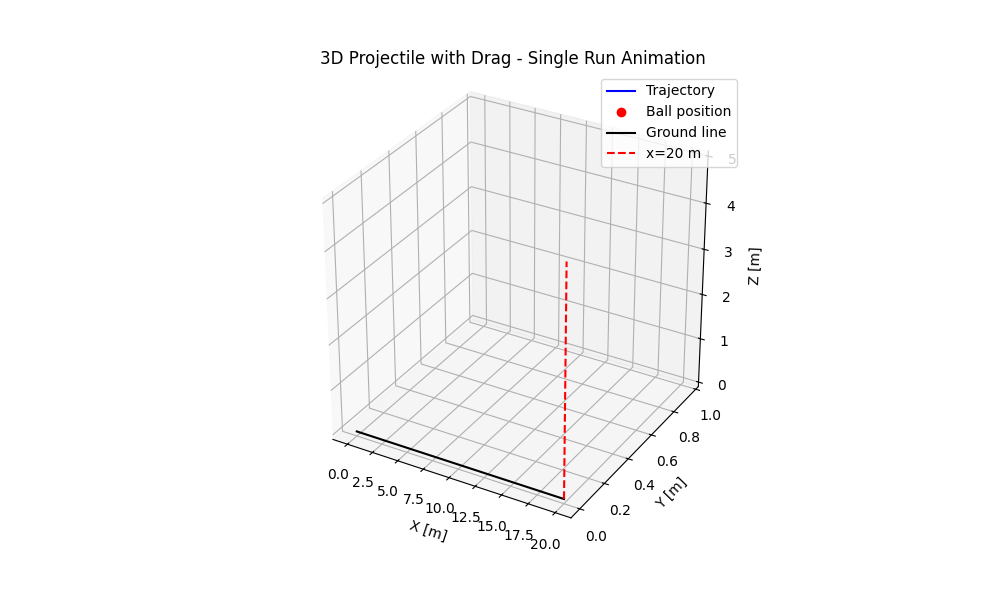

In [18]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ------------------------------------------------
# 1) PHYSICAL CONSTANTS & PARAMETERS
# ------------------------------------------------
g = 9.81      # gravitational acceleration (m/s^2)
rho = 1.225   # air density (kg/m^3) at sea level

# Roughly spherical ball (5.5 oz in kg)
m   = 0.156   # mass (kg)
C_d = 0.5     # drag coefficient
A   = 0.004   # cross-sectional area (m^2)

wind_speed = 3.0  # +y direction (m/s)
e = 0.8           # coefficient of restitution for ground bounce

# ------------------------------------------------
# 2) INITIAL CONDITIONS
# ------------------------------------------------
y_0       = 1.8         # launch height (m)
theta_deg = -5.14        # slight downward angle
v_init    = 45.0         # initial speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0
v_z0 = v_init * np.sin(theta_rad)

x0, y0, z0 = 0.0, 0.0, y_0

# We'll stop plotting at x=20 m
x_stop = 20.0

# ------------------------------------------------
# 3) TIME-STEPPING & TRAJECTORY STORAGE
# ------------------------------------------------
dt    = 0.01
t_max = 10.0

t_vals = []
x_vals = []
y_vals = []
z_vals = []

# Euler integration loop to build the full trajectory
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # Relative velocity (wind in +y)
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # Drag force
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x = F_drag_y = F_drag_z = 0.0
    
    # Net forces
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z
    
    # Accelerations
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # Update velocities (Euler)
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # Update positions (Euler)
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    t_cur += dt
    
    # Ground bounce
    if z_cur <= 0.0:
        if z_old > 0.0:
            z_cur = 0.0
            vz_cur = -e * vz_cur
        if z_cur < 0.0:
            z_cur = 0.0
    
    # Stop at x=20
    if x_cur >= x_stop:
        x_cur = x_stop
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# Convert to NumPy arrays
t_vals = np.array(t_vals)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
z_vals = np.array(z_vals)

# ------------------------------------------------
# 4) SETUP FIGURE & 3D AXES (NO full plot yet)
# ------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("3D Projectile with Drag - Single Run Animation")
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")

# Create line & point objects, initially empty
line, = ax.plot([], [], [], 'b-', label="Trajectory")
point, = ax.plot([], [], [], 'ro', label="Ball position")

# Some reference lines (plotted once)
ground_xmax = max(x_stop, x_vals.max())
ax.plot([0, ground_xmax], [0, 0], [0, 0], 'k', label="Ground line")
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.set_box_aspect((1, 1, 1))
ax.legend()

# ------------------------------------------------
# 5) INIT & UPDATE FUNCTIONS FOR ANIMATION
# ------------------------------------------------
def init_func():
    """Clear the line and point for the start of the animation."""
    line.set_data([], [])
    line.set_3d_properties([])
    
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def update_func(frame):
    """
    For each frame, display the partial trajectory up to `frame`.
    """
    # Slices up to 'frame'
    line.set_data(x_vals[:frame], y_vals[:frame])
    line.set_3d_properties(z_vals[:frame])
    
    # Position the "ball" at the last coordinate in that slice
    if frame > 0:
        x_now = x_vals[frame - 1]
        y_now = y_vals[frame - 1]
        z_now = z_vals[frame - 1]
        point.set_data([x_now], [y_now])
        point.set_3d_properties([z_now])
    
    return line, point

# ------------------------------------------------
# 6) CREATE ANIMATION (NO REPEATS)
# ------------------------------------------------
frames_total = len(x_vals)

ani = FuncAnimation(
    fig,
    update_func,
    frames=frames_total,   # one frame per data point
    init_func=init_func,
    interval=20,           # ~50 FPS
    blit=False,
    repeat=False           # <-- DOES NOT LOOP
)

plt.show()


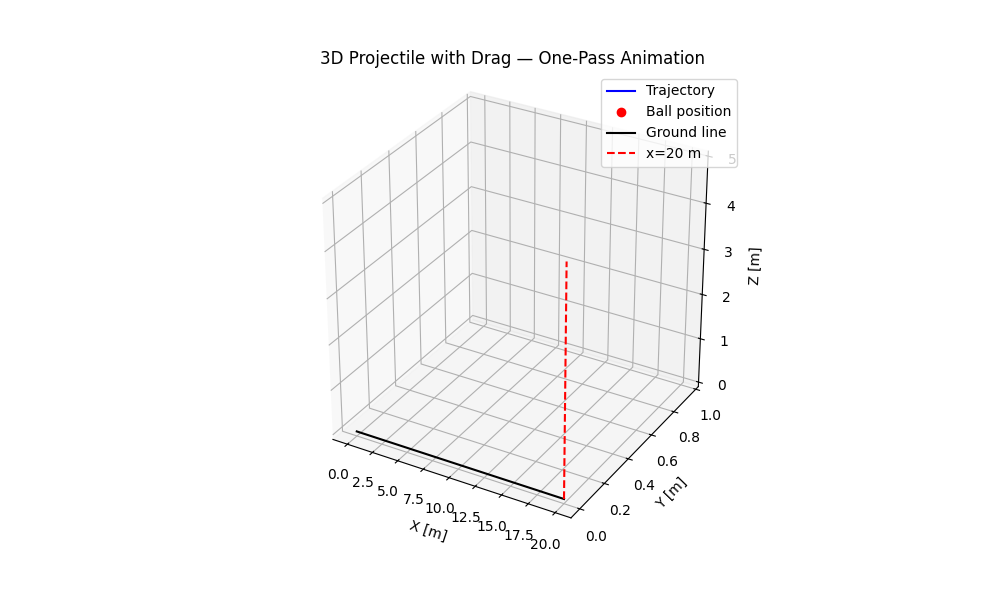

In [17]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ------------------------------------------------
# 1) PHYSICAL CONSTANTS & PARAMETERS
# ------------------------------------------------
g = 9.81      # gravitational acceleration (m/s^2)
rho = 1.225   # air density (kg/m^3)

# Approx. for a 5.5-oz cricket/ball
m   = 0.156   # mass (kg)
C_d = 0.5     # drag coefficient
A   = 0.004   # cross-sectional area (m^2)

wind_speed = 3.0   # +y direction (m/s)
e = 0.8            # restitution (bounce)

# ------------------------------------------------
# 2) INITIAL CONDITIONS
# ------------------------------------------------
y_0       = 1.8       # launch height (m)
theta_deg = -5.14      # angle in degrees (slightly downward)
v_init    = 45.0       # initial speed (m/s)

theta_rad = np.radians(theta_deg)
v_x0 = v_init * np.cos(theta_rad)
v_y0 = 0.0
v_z0 = v_init * np.sin(theta_rad)

x0, y0, z0 = 0.0, 0.0, y_0

# We'll stop plotting at x=20 m
x_stop = 20.0

# ------------------------------------------------
# 3) TIME-STEPPING & TRAJECTORY STORAGE
# ------------------------------------------------
dt    = 0.01
t_max = 10.0

t_vals = []
x_vals = []
y_vals = []
z_vals = []

# Euler integration loop
t_cur = 0.0
x_cur, y_cur, z_cur = x0, y0, z0
vx_cur, vy_cur, vz_cur = v_x0, v_y0, v_z0

while t_cur <= t_max:
    t_vals.append(t_cur)
    x_vals.append(x_cur)
    y_vals.append(y_cur)
    z_vals.append(z_cur)
    
    # Relative velocity for drag
    v_rel_x = vx_cur
    v_rel_y = vy_cur - wind_speed
    v_rel_z = vz_cur
    v_rel   = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    
    # Drag force
    if v_rel != 0.0:
        F_drag_x = -0.5 * rho * C_d * A * v_rel_x * v_rel
        F_drag_y = -0.5 * rho * C_d * A * v_rel_y * v_rel
        F_drag_z = -0.5 * rho * C_d * A * v_rel_z * v_rel
    else:
        F_drag_x = F_drag_y = F_drag_z = 0.0
    
    # Net forces
    Fx = F_drag_x
    Fy = F_drag_y
    Fz = -m*g + F_drag_z
    
    # Accelerations
    ax = Fx / m
    ay = Fy / m
    az = Fz / m
    
    # Update velocities
    vx_cur += ax * dt
    vy_cur += ay * dt
    vz_cur += az * dt
    
    # Update positions
    x_old, y_old, z_old = x_cur, y_cur, z_cur
    x_cur += vx_cur * dt
    y_cur += vy_cur * dt
    z_cur += vz_cur * dt
    t_cur += dt
    
    # Bounce if below ground
    if z_cur <= 0.0:
        if z_old > 0.0:
            z_cur = 0.0
            vz_cur = -e * vz_cur
        if z_cur < 0.0:
            z_cur = 0.0
    
    # Stop at x=20
    if x_cur >= x_stop:
        x_cur = x_stop
        t_vals.append(t_cur)
        x_vals.append(x_cur)
        y_vals.append(y_cur)
        z_vals.append(z_cur)
        break

# Convert to NumPy arrays
t_vals = np.array(t_vals)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
z_vals = np.array(z_vals)

frames_total = len(x_vals)  # Number of data points

# ------------------------------------------------
# 4) SETUP FIGURE & 3D AXES
# ------------------------------------------------
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("3D Projectile with Drag — One-Pass Animation")
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.set_zlabel("Z [m]")

# Create line & point objects, initially empty
line, = ax.plot([], [], [], 'b-', label="Trajectory")
point, = ax.plot([], [], [], 'ro', label="Ball position")

# Reference lines
ax.plot([0, x_stop], [0, 0], [0, 0], 'k', label="Ground line")
ax.plot([x_stop, x_stop], [0, 0], [0, 5], 'r--', label="x=20 m")

ax.legend()
ax.set_box_aspect((1, 1, 1))

# ------------------------------------------------
# 5) INIT & UPDATE FUNCTIONS
# ------------------------------------------------
def init_func():
    # Clear the line/point
    line.set_data([], [])
    line.set_3d_properties([])
    
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def update_func(frame):
    # Update the line from index 0..frame
    line.set_data(x_vals[:frame], y_vals[:frame])
    line.set_3d_properties(z_vals[:frame])
    
    # Move the "ball" to the last coordinate in that slice
    if frame > 0:
        x_now = x_vals[frame - 1]
        y_now = y_vals[frame - 1]
        z_now = z_vals[frame - 1]
        point.set_data([x_now], [y_now])
        point.set_3d_properties([z_now])
    
    # Force a stop after final frame
    if frame == frames_total - 1:
        ani.event_source.stop()  # <--- forcibly end
    
    return line, point

# ------------------------------------------------
# 6) CREATE ANIMATION (NO REPEATS)
# ------------------------------------------------
ani = FuncAnimation(
    fig,
    update_func,
    frames=range(frames_total),  # each data point is one frame
    init_func=init_func,
    interval=20,     # ~50 FPS
    blit=False,
    repeat=False     # do NOT loop
)

plt.show()
